In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Titanic

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
titanic_train, titanic_validate, titanic_test = prepare.train_validate_test_split(prepare.prep_titanic(acquire.get_titanic_data()), 'survived')

What is your baseline prediction? 

In [3]:
#titanic_train.survived.value_counts()

In [4]:
#titanic_train['baseline_prediction'] = titanic_train.survived.value_counts().idxmax()

#baseline_accuracy = metrics.accuracy_score(y_true=titanic_train.survived, y_pred=titanic_train.baseline_prediction)

#print(f'Baseline accuracy: {baseline_accuracy:%}')

In [5]:
titanic_train.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,2,2,34.3750,Third,Southampton,0,0,0,1,0,1


What is your baseline accuracy? *remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.*

In [6]:
titanic_train.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,2,2,34.3750,Third,Southampton,0,0,0,1,0,1


In [7]:
#functions can't take strings so i dropped all columns that are strings
drop_columns = list(titanic_train.select_dtypes(include='object').columns)

titanic_train.drop(columns=drop_columns, inplace=True)

In [8]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived'])
y_train = titanic_train.survived

In [9]:

#figure out the mode of values in our target variable
titanic_train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [10]:
#baseline is 0 so then see where y_train is equal to 0 and then the mean of that
baseline_acc = (y_train == 0).mean()

print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline accuracy: 61.65%


In [11]:
#create my tree with no depth constraints
tree = DecisionTreeClassifier(max_depth = 3) # my algorithm

#fit my tree
tree = tree.fit(X_train, y_train) #my model

In [12]:
#model score
tree.score(X_train, y_train)

0.8052208835341366

In [13]:
# make prediction on train obeservations
y_pred = tree.predict(X_train)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [14]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[268,  39],
       [ 58, 133]])

In [15]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,268,39
1,58,133


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


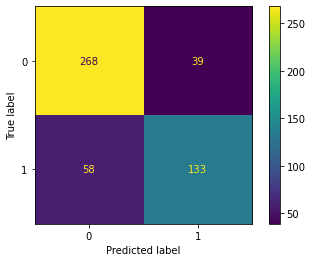

In [16]:
metrics.plot_confusion_matrix(tree, X_train, y_train, display_labels=[0, 1])

In [17]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       307
           1       0.77      0.70      0.73       191

    accuracy                           0.81       498
   macro avg       0.80      0.78      0.79       498
weighted avg       0.80      0.81      0.80       498



In [18]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

In [19]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8052208835341366 

True Positive Rate/Sensitivity/Recall/Power: 0.6963350785340314 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1270358306188925 

True Negative Rate/Specificity/Selectivity: 0.8729641693811075 

False Negative Rate/Miss Rate: 0.3036649214659686 

Precision/PPV: 0.7732558139534884 

F1 Score: 0.7327823691460056 

Support (0): 307 

Support (1): 191


### Find Optimal max_depth

In [20]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = metrics.classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.813505    0.711230    0.7751    0.762367      0.774279
recall       0.824104    0.696335    0.7751    0.760220      0.775100
f1-score     0.818770    0.703704    0.7751    0.761237      0.774638
support    307.000000  191.000000    0.7751  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.750623    0.938144  0.787149    0.844384      0.822544
recall       0.980456    0.476440  0.787149    0.728448      0.787149
f1-score     0.850282    0.631944  0.787149    0.741113      0.766542
support    307.000000  191.000000  0.787149  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.822086    0.773256  0.805221    0.797671      0.803358
recall       0.872964    0.696335  0.805221    0.784650      0.805221
f1-score     

In [21]:
drop_columns = list(titanic_validate.select_dtypes(include='object').columns)

titanic_validate.drop(columns=drop_columns, inplace=True)

In [22]:
X_validate = titanic_validate.drop(columns=['survived'])
y_validate = titanic_validate.survived

In [23]:
val_pred = tree.predict(X_validate)

In [24]:
#model accuracy score
tree.score(X_validate, y_validate)

0.7990654205607477

In [25]:
#confusion matrix
metrics.confusion_matrix(y_validate, val_pred)

array([[117,  15],
       [ 28,  54]])

In [26]:
print(metrics.classification_report(y_validate, val_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       132
           1       0.78      0.66      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214



In [29]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metric = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metric.append(output)
    
df = pd.DataFrame(metric)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.775100,0.808411,-0.033311
1,2,0.787149,0.780374,0.006775
2,3,0.805221,0.822430,-0.017209
3,4,0.819277,0.808411,0.010866
4,5,0.835341,0.808411,0.026930
5,6,0.861446,0.799065,0.062380
6,7,0.889558,0.817757,0.071801
7,8,0.901606,0.808411,0.093195
8,9,0.917671,0.813084,0.104587
9,10,0.925703,0.799065,0.126637


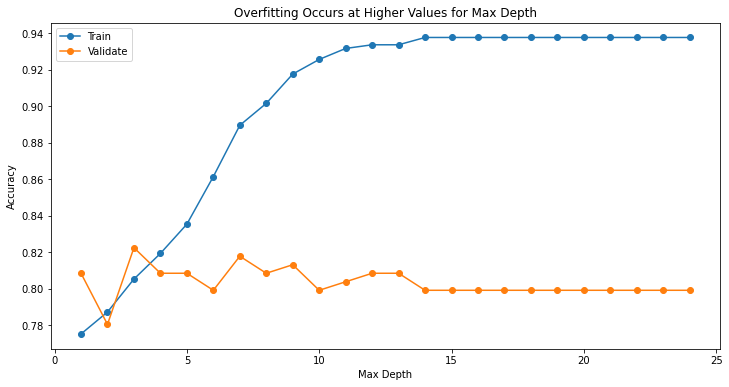

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
2,3,0.805221,0.822430,-0.017209
6,7,0.889558,0.817757,0.071801
0,1,0.775100,0.808411,-0.033311
3,4,0.819277,0.808411,0.010866
4,5,0.835341,0.808411,0.026930
7,8,0.901606,0.808411,0.093195
5,6,0.861446,0.799065,0.062380
1,2,0.787149,0.780374,0.006775


## Telco

In [50]:
telco_train, telco_validate, telco_test = prepare.train_validate_test_split(prepare.prep_telco(acquire.get_telco_data()), 'churn')

In [51]:
telco_train.churn_Yes.value_counts()

0    2891
1    1046
Name: churn_Yes, dtype: int64

In [52]:
#baseline is 0 so then see where y_train is equal to 0 and then the mean of that
baseline_acc = (y_train == 0).mean()

print(f'Baseline accuracy: {baseline_acc:.2%}')

Baseline accuracy: 73.43%


In [53]:
telco_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4491,Male,0,No,No,48,Yes,No,No,Yes,Yes,...,1,0,0,0,1,0,0,1,0,0
2346,Female,0,Yes,Yes,58,Yes,No,No internet service,No internet service,No internet service,...,0,1,0,0,1,0,1,0,0,1
770,Female,0,No,Yes,44,Yes,Yes,No,Yes,No,...,1,1,0,1,0,0,0,0,0,1
5155,Male,0,Yes,No,10,Yes,Yes,No,No,No,...,0,1,1,0,0,1,0,0,1,0
189,Female,0,No,Yes,11,No,No phone service,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1


In [54]:
drop_columns = list(telco_train.select_dtypes(include='object').columns)

telco_train.drop(columns=drop_columns, inplace=True)

In [55]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 4491 to 3781
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         3937 non-null   int64  
 1   tenure                                 3937 non-null   int64  
 2   monthly_charges                        3937 non-null   float64
 3   total_charges                          3937 non-null   float64
 4   gender_Male                            3937 non-null   uint8  
 5   partner_Yes                            3937 non-null   uint8  
 6   dependents_Yes                         3937 non-null   uint8  
 7   phone_service_Yes                      3937 non-null   uint8  
 8   multiple_lines_No phone service        3937 non-null   uint8  
 9   multiple_lines_Yes                     3937 non-null   uint8  
 10  online_security_No internet service    3937 non-null   uint8  
 11  o

In [56]:
X_train = telco_train.drop(columns=['churn_Yes'])
y_train = telco_train.churn_Yes

In [57]:
telco_tree = DecisionTreeClassifier()

telco_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = telco_tree.predict(X_train)

In [59]:
#model score
telco_tree.score(X_train, y_train)

0.9982219964439929

In [60]:
#confusion matrix
metrics.confusion_matrix(y_train, y_pred)

array([[2891,    0],
       [   7, 1039]])

In [61]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2891
           1       1.00      0.99      1.00      1046

    accuracy                           1.00      3937
   macro avg       1.00      1.00      1.00      3937
weighted avg       1.00      1.00      1.00      3937



In [62]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

In [63]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9982219964439929 

True Positive Rate/Sensitivity/Recall/Power: 0.9933078393881453 

False Positive Rate/False Alarm Ratio/Fall-out: 0.0 

True Negative Rate/Specificity/Selectivity: 1.0 

False Negative Rate/Miss Rate: 0.006692160611854685 

Precision/PPV: 1.0 

F1 Score: 0.9966426858513189 

Support (0): 2891 

Support (1): 1046


### Find Optimal max_depth

In [64]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = metrics.classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734315     0.0  0.734315     0.367158      0.539219
recall        1.000000     0.0  0.734315     0.500000      0.734315
f1-score      0.846807     0.0  0.734315     0.423404      0.621824
support    2891.000000  1046.0  0.734315  3937.000000   3937.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.800474     0.665474  0.781306     0.732974      0.764606
recall        0.935316     0.355641  0.781306     0.645479      0.781306
f1-score      0.862658     0.463551  0.781306     0.663104      0.756621
support    2891.000000  1046.000000  0.781306  3937.000000   3937.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.800474     0.665474  0.781306     0.732974      0.764606
recall        0.935316     0.355641  0.781306     0.645479      0.781306

**max_depth = 19+ is giving us the best accuracy**

In [70]:
drop_columns = list(telco_validate.select_dtypes(include='object').columns)

telco_validate.drop(columns=drop_columns, inplace=True)

In [71]:
X_validate = telco_validate.drop(columns=['churn_Yes'])
y_validate = telco_validate.churn_Yes

In [72]:
val_pred = telco_tree.predict(X_validate)

In [80]:
#model accuracy score
telco_tree.score(X_validate, y_validate)

0.7322274881516587

In [74]:
#confusion matrix
metrics.confusion_matrix(y_validate, val_pred)

array([[1008,  231],
       [ 221,  228]])

In [75]:
print(metrics.classification_report(y_validate, val_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1239
           1       0.50      0.51      0.50       449

    accuracy                           0.73      1688
   macro avg       0.66      0.66      0.66      1688
weighted avg       0.73      0.73      0.73      1688



In [76]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metric = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metric.append(output)
    
df = pd.DataFrame(metric)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734315,0.734005,0.000311
1,2,0.781306,0.795024,-0.013718
2,3,0.781306,0.795024,-0.013718
3,4,0.784862,0.799763,-0.014901
4,5,0.792990,0.808057,-0.015067
5,6,0.805944,0.802133,0.003811
6,7,0.823470,0.789692,0.033778
7,8,0.841250,0.783175,0.058074
8,9,0.856998,0.785545,0.071453
9,10,0.882652,0.762441,0.120211


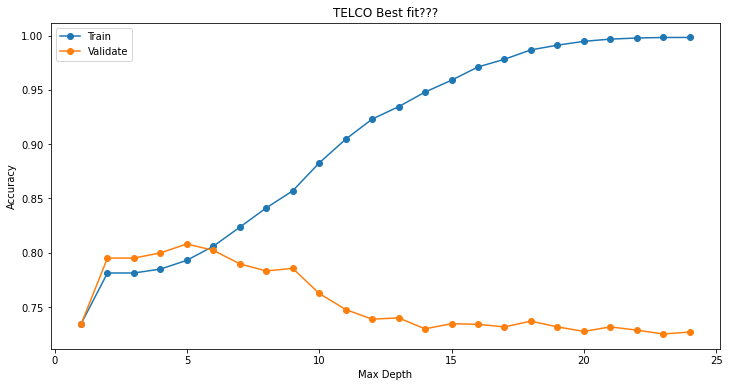

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('TELCO Best fit???')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
4,5,0.792990,0.808057,-0.015067
5,6,0.805944,0.802133,0.003811
3,4,0.784862,0.799763,-0.014901
1,2,0.781306,0.795024,-0.013718
2,3,0.781306,0.795024,-0.013718
6,7,0.823470,0.789692,0.033778
8,9,0.856998,0.785545,0.071453
7,8,0.841250,0.783175,0.058074
0,1,0.734315,0.734005,0.000311


## Random Forest
Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
titanic_train, titanic_validate, titanic_test = prepare.train_validate_test_split(prepare.prep_titanic(acquire.get_titanic_data()),'survived')
                                                                                  
titanic_train.shape, titanic_validate.shape, titanic_test.shape  

((667, 13), (134, 13), (90, 13))

In [6]:
#functions can't take strings so i dropped all columns that are strings
drop_columns = list(titanic_train.select_dtypes(include='object').columns) + ['survived']

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=drop_columns)
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=drop_columns)
y_validate = titanic_validate.survived



In [7]:
rf = RandomForestClassifier(max_depth=10, random_state=123, min_samples_leaf=1)

In [8]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [10]:
rf.score(X_train, y_train)

0.9250374812593704

In [11]:
print(rf.feature_importances_)

[0.05872251 0.0613704  0.40341613 0.02235967 0.30397158 0.02519896
 0.07346358 0.01740994 0.03408722]


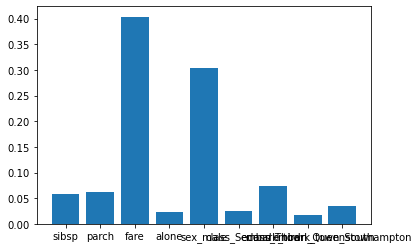

In [12]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [14]:
y_pred = rf.predict(X_train)

In [15]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.93


In [17]:
cm = metrics.confusion_matrix(y_train, y_pred)
print(cm)

[[395  16]
 [ 34 222]]


In [18]:
#classification report
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       411
           1       0.93      0.87      0.90       256

    accuracy                           0.93       667
   macro avg       0.93      0.91      0.92       667
weighted avg       0.93      0.93      0.92       667



In [19]:
TN, FP, FN, TP = metrics.confusion_matrix(y_train, y_pred).ravel()

In [20]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9250374812593704 

True Positive Rate/Sensitivity/Recall/Power: 0.8671875 

False Positive Rate/False Alarm Ratio/Fall-out: 0.038929440389294405 

True Negative Rate/Specificity/Selectivity: 0.9610705596107056 

False Negative Rate/Miss Rate: 0.1328125 

Precision/PPV: 0.9327731092436975 

F1 Score: 0.8987854251012145 

Support (0): 411 

Support (1): 256


In [24]:
p=20
for i in range(1,21):
    # Make the model
    tree = RandomForestClassifier(max_depth=p, min_samples_leaf=i)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = metrics.classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {p} and min_samples_leaf {i}")
    print(pd.DataFrame(report),'\n')
    p-=1

Tree with max depth of 20 and min_samples_leaf 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.933962    0.938272  0.935532    0.936117      0.935616
recall       0.963504    0.890625  0.935532    0.927064      0.935532
f1-score     0.948503    0.913828  0.935532    0.931165      0.935194
support    411.000000  256.000000  0.935532  667.000000    667.000000 

Tree with max depth of 19 and min_samples_leaf 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.894860    0.882845  0.890555    0.888853      0.890249
recall       0.931873    0.824219  0.890555    0.878046      0.890555
f1-score     0.912992    0.852525  0.890555    0.882758      0.889784
support    411.000000  256.000000  0.890555  667.000000    667.000000 

Tree with max depth of 18 and min_samples_leaf 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.864989    0.856522  0.862069    0.860755      0.861739
recall   

**Looks like max_depth=20 and min_samples_leaf=1 is the best**